# [Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

   1. [Scikit-Learn Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
   2. [Scatter Plots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Reading data
d = pd.read_csv('../data/default.csv')

##get dummies of student for plotting
student_dummies = pd.get_dummies(d.student, prefix='Student')
d['Student_yes'] = student_dummies['Student_Yes']
d.head()


,default,student,balance,income,Student_yes
0,0,No,729.526495,44361.62507,0
1,0,Yes,817.180407,12106.13470,1
2,0,No,1073.549164,31767.13895,0
3,0,No,529.250605,35704.49394,0
4,0,No,785.655883,38463.49588,0


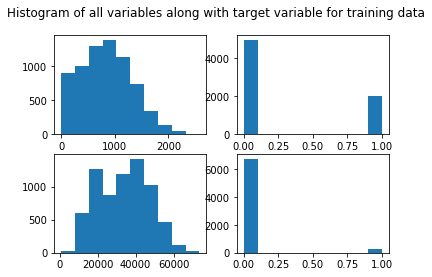

In [3]:
# Spliting the data into train and test sets
X = d[['balance','Student_yes','income']]

y = d.default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Convert them to dataframes, for convenience
train = pd.DataFrame(data=X_train, columns=['balance','Student_yes','income'])
test = pd.DataFrame(data=X_test, columns=['balance','Student_yes','income'])

# Create a histogram of all variables along with target variable for training data
fig, ax = plt.subplots(2,2)
plt.suptitle('Histogram of all variables along with target variable for training data')
ax[0,0].hist(train['balance'])
ax[0,1].hist(train['Student_yes'])
ax[1,0].hist(train['income'])
ax[1,1].hist(y_train)
plt.show()



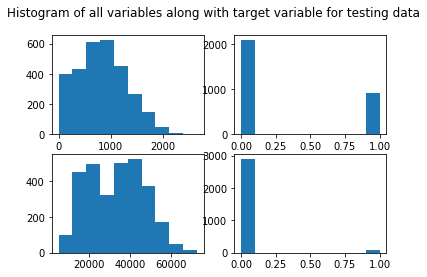

In [4]:
# Create a histogram of all variables along with target variable for testing data
fig, ax = plt.subplots(2,2)
plt.suptitle('Histogram of all variables along with target variable for testing data')
ax[0,0].hist(test['balance'])
ax[0,1].hist(test['Student_yes'])
ax[1,0].hist(test['income'])
ax[1,1].hist(y_test)
plt.show()

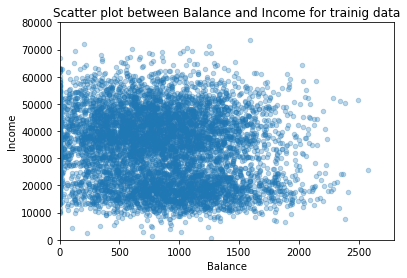

In [5]:
# Create a scatter plot of the income vs. balance
train.plot(x='balance', y='income', kind='scatter', alpha=0.3)
plt.ylim([0,80000]); plt.xlim([0, 2800])
plt.title("Scatter plot between Balance and Income for trainig data")
plt.xlabel("Balance")
plt.ylabel("Income")
plt.show()

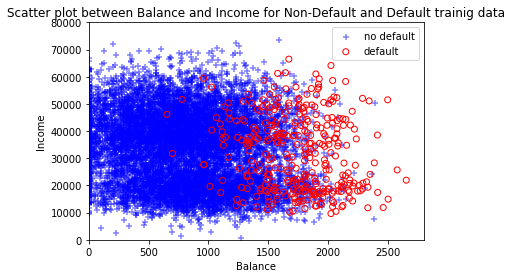

In [6]:
# Mark defaults with a different color and symbol
train_nd = d[d.default == 0]
train_d = d[d.default == 1]

plt.figure()
plt.scatter(train_nd.balance, train_nd.income, alpha = .5, marker='+', c= 'b')
plt.title("Scatter plot between Balance and Income for Non-Default and Default trainig data")
plt.xlabel("Balance")
plt.ylabel("Income")
plt.scatter(train_d.balance, train_d.income, marker='o', 
            edgecolors = 'r', facecolors = 'none')
plt.ylim([0,80000]); plt.xlim([0, 2800])
plt.legend( ('no default', 'default'), loc='upper right')
plt.show()
# 6 - What can you infer from this plot?
# It appears that the balance is more correlated with default than income

In [7]:
'''
PART II - LOGISTIC REGRESSION
'''

# Run a logistic regression on the balance variable
# What are the beta values?
balance = LogisticRegression()
balance.fit(train[['balance']], y_train)
B1 = balance.coef_[0][0]
B0 = balance.intercept_[0]
print('Coefficient and Intercept for LR fit between balance and default data are {}, {}'.format(B1, B0))

# Predict the probability of default for someone with a balance of $1.7k and $2.5k
pred_prob = balance.predict_proba(pd.DataFrame({'balance': [1700, 2500]}))
pred_class = balance.predict(pd.DataFrame({'balance': [1700, 2500]}))
print('Predicted Class and its probability for a balance of 1700 are {}, {}'.format(pred_class[0], pred_prob[0][0]))
print('Predicted Class and its probability for a balance of 2500 are {}, {}'.format(pred_class[1], pred_prob[1][1]))
# What does beta mean? Let's create some plots to find out!
x = np.linspace(test.balance.min(), test.balance.max(),500)
beta = [B0,B1]

y = np.exp(beta[0] + beta[1]*x) / (1 + np.exp(beta[0] + beta[1]*x))
odds = np.exp(beta[0] + beta[1]*x)
log_odds = beta[0] + beta[1]*x

Coefficient and Intercept for LR fit between balance and default data are 0.004297975067104051, -8.60113298967785
Predicted Class and its probability for a balance of 1700 are 0, 0.7849206121059221
Predicted Class and its probability for a balance of 2500 are 1, 0.8950884267188306


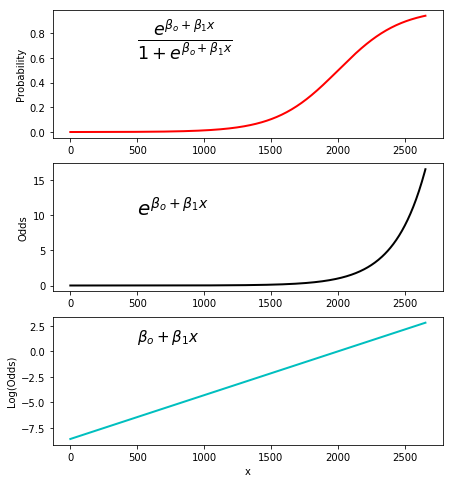

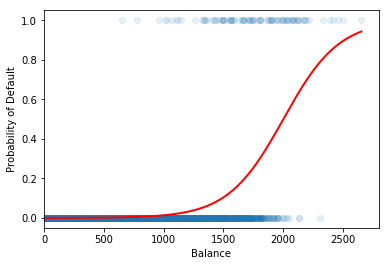

In [8]:
plt.figure(figsize=(7, 8))
plt.subplot(311)
plt.plot(x, y, 'r', linewidth=2)
plt.ylabel('Probability')
plt.text(500, 0.7, r'$\frac{e^{\beta_o + \beta_1x}}{1+e^{\beta_o + \beta_1x}}$', fontsize=25)

plt.subplot(312)
plt.plot(x, odds, 'k', linewidth=2)
plt.ylabel('Odds')
plt.text(500, 10, r'$e^{\beta_o + \beta_1x}$', fontsize=20)

plt.subplot(313)
plt.plot(x, log_odds, 'c', linewidth=2)
plt.ylabel('Log(Odds)')
plt.xlabel('x')
plt.text(500, 1, r'$\beta_o + \beta_1x$', fontsize=15)


# Plot the fitted logistic function overtop of the data points
plt.figure()
plt.scatter(test.balance, y_test, alpha=0.1)
plt.plot(x, y, 'r', linewidth=2)
plt.xlabel("Balance")
plt.ylabel("Probability of Default")
plt.ylim([-0.05,1.05]); plt.xlim([0, 2800])

# Create predictions using the balance model on the test set
test['pred_class'] = balance.predict(test[['balance']])